In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('okt_fasttext_부도기사비율완전체.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)
data.rename(columns={'운전자산총자본비율':'운전자본비율'}, inplace=True)
data.fillna(0, inplace=True)
# data.drop(['회사명', '회계년도', '폐지일자'], axis=1, inplace=True)
feature = data.iloc[:,[2,3,4,5,6,8]]
target = data.iloc[:,9]

columns = ['Accuracy', 'Roc_auc_score', 'Recall']
비교테이블 = pd.DataFrame(columns = columns)

np.random.seed(42)

In [3]:
model_list = [LogisticRegression, RandomForestClassifier, SVC, XGBClassifier]

for model in model_list:

    x_train, x_test, y_train, y_test = train_test_split(feature, target, random_state=42, test_size=0.2)

    ss = StandardScaler()
    x_train = ss.fit_transform(x_train)
    x_test = ss.fit_transform(x_test)

    model_ = model()

    model_.fit(x_train, y_train)
    pred = model_.predict(x_test)
    acc = accuracy_score(pred, y_test)
    roc = roc_auc_score(pred, y_test)
    rec = recall_score(pred, y_test)

    비교테이블.loc[model.__name__] = [acc, roc, rec]

In [4]:
비교테이블

,Accuracy,Roc_auc_score,Recall
LogisticRegression,0.851852,0.858333,0.916667
RandomForestClassifier,0.833333,0.833333,0.851852
SVC,0.851852,0.853022,0.884615
XGBClassifier,0.814815,0.815934,0.846154


In [11]:
model_list = [LogisticRegression, RandomForestClassifier, SVC]

for model in model_list:

    x_train, x_test, y_train, y_test = train_test_split(feature, target, random_state=42, test_size=0.3)

    ss = StandardScaler()
    x_train = ss.fit_transform(x_train)
    x_test = ss.fit_transform(x_test)
    if model == SVC:
        model_ = model()
    
    else:
        model_ = model()

    model_.fit(x_train, y_train)
    pred = model_.predict(x_test)
    acc = accuracy_score(pred, y_test)
    roc = roc_auc_score(pred, y_test)
    rec = recall_score(pred, y_test)

    비교테이블.loc[model.__name__] = [acc, roc, rec]

In [7]:
비교테이블
#선형분리

,Accuracy,Roc_auc_score,Recall
LogisticRegression,0.827160,0.837578,0.914286
RandomForestClassifier,0.839506,0.839373,0.840909
SVC,0.777778,0.776928,0.790698


In [39]:
비교테이블
# 비선형 분리일때, 더 잘 분리

,Accuracy,Roc_auc_score,Recall
LogisticRegression,0.759259,0.762069,0.800000
RandomForestClassifier,0.796296,0.796552,0.793103
SVC,0.814815,0.816667,0.800000


### 로지스틱 회귀 

## 회귀계수 확인  
독립변수가 분류 결정에 미치는 영향의 정도    


In [40]:
import statsmodels.api as sm
# x_train, x_test, y_train, y_test = train_test_split(feature, target, random_state=42, test_size=0.2)

# ss = StandardScaler()
# model_ = LogisticRegression()
# x_train = ss.fit_transform(x_train)
# x_test = ss.fit_transform(x_test)

logit=sm.Logit(target,feature)
result1=logit.fit()
result1.summary()


# model_.fit(x_train, y_train)
# pred = model_.predict(x_test)
# acc = accuracy_score(pred, y_test)
# roc = roc_auc_score(pred, y_test)
# rec = recall_score(pred, y_test)


Optimization terminated successfully.
         Current function value: 0.388435
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 부실기업여부   No. Observations:                  270
Model:                          Logit   Df Residuals:                      265
Method:                           MLE   Df Model:                            4
Date:                Fri, 01 Jul 2022   Pseudo R-squ.:                  0.4396
Time:                        15:27:00   Log-Likelihood:                -104.88
converged:                       True   LL-Null:                       -187.15
Covariance Type:            nonrobust   LLR p-value:                 1.549e-34
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
운전자본비율        -0.0011      0.008     -0.133      0.894      -0.017       0.015
이익잉여금총자산비율    -0.0224      0.006     -3.913      0.000      -0.034      -0.011
총자산이익율        -0.1281      0.028     -4.597      0.000      -0.183      -0.073
시장가부채비율       -0.0005      0.001     -0.671      0.502      -0.002       0.001
매출액회전율      7.337e-05      0.002      0.036      0.971      -0.004       0.004
==============================================================================
"""

In [42]:
# 오즈비 
# 아무런 관계 없다 = 1에 가까움 , 1에서 멀리 떨어질 수록 종속변수와의 관계 강함
# 운전 1단위 증가 부도날 확률 0.99 증가
# 하지만 모든 빙ㄹ이 1에 가까움 .... 관계 깊지 않다?
np.exp(result1.params)


운전자본비율        0.998916
이익잉여금총자산비율    0.977879
총자산이익율        0.879805
시장가부채비율       0.999491
매출액회전율        1.000073
dtype: float64

In [43]:
logit=sm.Logit(y_train,x_train)
result=logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.399476
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 부실기업여부   No. Observations:                  216
Model:                          Logit   Df Residuals:                      211
Method:                           MLE   Df Model:                            4
Date:                Fri, 01 Jul 2022   Pseudo R-squ.:                  0.4236
Time:                        15:32:39   Log-Likelihood:                -86.287
converged:                       True   LL-Null:                       -149.71
Covariance Type:            nonrobust   LLR p-value:                 1.839e-26
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2377      0.284     -0.837      0.403      -0.794       0.319
x2            -1.9281      0.

In [44]:
np.exp(result.params)

# x2,x3 종속변수에 영향을 많이 줌
# x5 종속변수에 영향 안줌 
# x1,x4 종속변수에 영향 조금 줌

x1    0.788467
x2    0.145426
x3    0.208961
x4    0.659608
x5    0.992267
dtype: float64

### 파라미터 조정 
1. penalty : 설정 가능 값 : 'l1', 'l2', 'elasticnet', 'none' , 
기본 값 : 'l2'  
1차, 2차, 1차+2차 혼합, 미규제 중에서 복잡한 모델에 대한 규제 방법을 선택

2. C : penalty에 대한 계수 설정, 기본 값은 1.0, 높을 수록 복잡한 모델에 대한 규제 강화->  학습 데이터와 테스트 데이터에 대해 각각 score를 체크한 결과 테스트 데이터에 대한 정확도가 학습 데이터에 대한 정확도가 높다. 이럴 땐 모델제작이 잘못되지 않았나 의심해보아야한다. C값을 조절하여 모델을 재생성한다.

3. solver : 설정 가능 값 : ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ 기본 값 : 'lbfgs'
로지스틱 회귀는 비선형 방정식이라 근사 알고리즘으로 접근하는데, 알고리즘의 종류 선택
특정 solver는 일부 penalty 방식을 지원하지 않을 수도 있음

4. intercept_scaling : 정규화 효과 정도
5. max_iter : 계산에 사용할 작업 수

In [19]:

ss = StandardScaler()
lr = LogisticRegression()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)
# logit=sm.Logit(target,feature)
# result=logit.fit()
# result.summary()

lr.fit(x_train, y_train) # gradient descent 수행하여 최적의 coef와 intercept를 찾아줌
pred = lr.predict(x_test) #  classification threshold를 0.5
acc = accuracy_score(pred, y_test)
roc = roc_auc_score(pred, y_test)
rec = recall_score(pred, y_test)



(-5, 5)

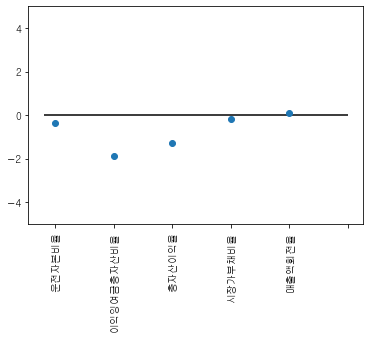

In [21]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

plt.plot(model.coef_.T, 'o')
plt.xticks(range(data.shape[1]), data.columns[:5], rotation=90)
xlim = plt.xlim()
plt.hlines(0, xlim[0], xlim[1])
plt.ylim(-5,5)

### 상관관계 분석

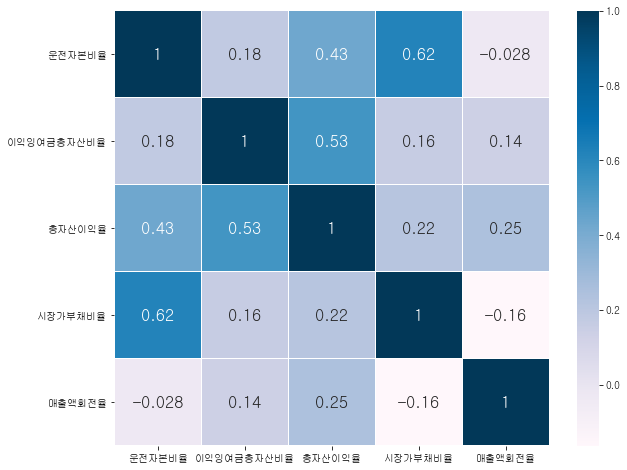

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
 
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
 
heatmap_data =feature

colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Pearson Correlation of Features", y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})


plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()


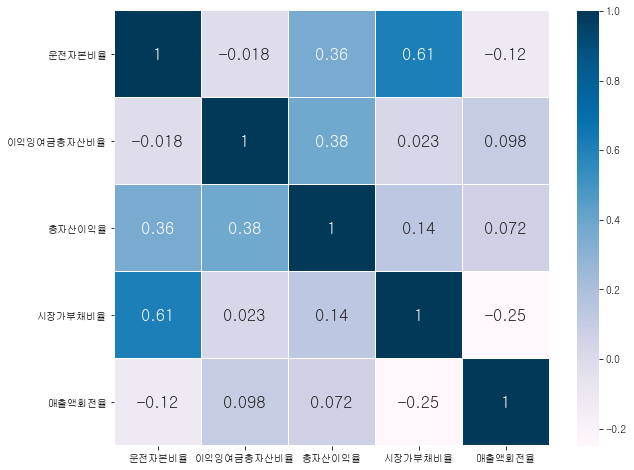

In [116]:
heatmap_data =부도

colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Pearson Correlation of Features", y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})


plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

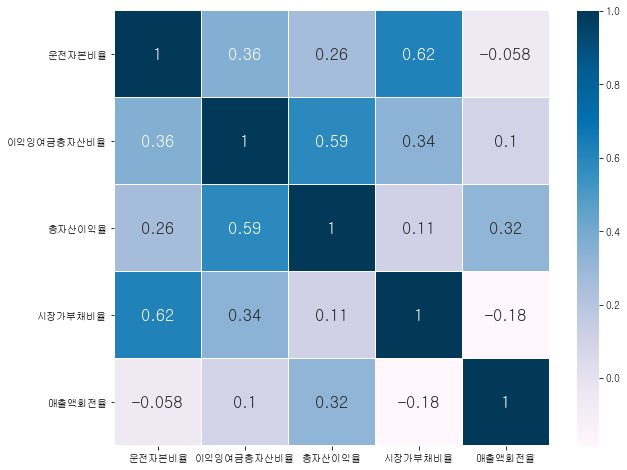

In [117]:
heatmap_data = 정상

colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Pearson Correlation of Features", y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})


plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [9]:
from sklearn.model_selection import cross_val_score, cross_validate
for model in model_list:
    ss.fit(feature)
    scores = cross_val_score(model_.fit(x_train, y_train), feature, target, cv = 5)
scores

array([0.7962963 , 0.72222222, 0.7962963 , 0.7962963 , 0.83333333])

In [10]:
scores.mean()

0.788888888888889

## 서포트 벡터 머신 -SVC

### 선형

In [13]:
from sklearn.model_selection import GridSearchCV

# 파라미터 조정 선형일떄 , GAMMA 할 필요 없음 , c 작게 하면 분류 부정확 마진 크게,c크게 분류 정확 
svm_clf = SVC(kernel = 'linear',random_state=100)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]}

grid_svm = GridSearchCV(svm_clf,
                      param_grid = parameters, cv = 5)

grid_svm.fit(x_train, y_train)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)






,C,mean_test_score
3,1.000,0.809388
4,10.000,0.804125
5,25.000,0.804125
6,50.000,0.804125
7,100.000,0.804125
2,0.100,0.803983
1,0.010,0.761593
0,0.001,0.513229


### 비선형

In [9]:
from sklearn.model_selection import GridSearchCV

#파라미터 조정(비선형일때)
# C 데이터 샘플들이 다른 클래스에 놓이는 것을 허용하는 정도 : 클수록 결정경계가 정확해짐=> 굴곡짐, 낮을 수록 직선에 가까움
# Gamma 결정 경계의 곡률:작을수록 reach가 멀다 데이터의 범위가 멀다=> 멀리있는 데이터까지 경계를 나누는데 영향을 준다, =>선이 데이터 하나값때문에 구부러 지지 않는다.
# 클수록 reach가 좁다=> 결정결계와 가까이 있는 데이터만이 선의 굴곡에 영향을 준다.  
# 과적합 조심!

svm_clf = SVC(kernel = 'rbf',random_state=100)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100],
                'gamma':[1, 0.1, 0.01, 0.001, 0.00001, 10]}

grid_svm = GridSearchCV(svm_clf,
                      param_grid = parameters, scoring="roc_auc", cv = 5)

grid_svm.fit(x_train, y_train)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)



,C,gamma,mean_test_score
26,10.000,0.01000,0.904152
33,25.000,0.00100,0.902558
32,25.000,0.01000,0.901141
44,100.000,0.01000,0.901023
39,50.000,0.00100,0.900807
38,50.000,0.01000,0.900649
45,100.000,0.00100,0.900335
25,10.000,0.10000,0.895081
27,10.000,0.00100,0.893192
19,1.000,0.10000,0.891165


In [8]:

svm_clf = SVC(kernel = 'rbf',random_state=100)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100],
                'gamma':[1, 0.1, 0.01, 0.001, 0.00001, 10]}

grid_svm = GridSearchCV(svm_clf,
                      param_grid = parameters, scoring=["accuracy"], cv = 5)

grid_svm.fit(x_train, y_train)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,C,gamma,mean_test_score
44,100.000,0.01000,0.851480
38,50.000,0.01000,0.851374
26,10.000,0.01000,0.842072
32,25.000,0.01000,0.837526
45,100.000,0.00100,0.832875
19,1.000,0.10000,0.828224
39,50.000,0.00100,0.828224
18,1.000,1.00000,0.823679
31,25.000,0.10000,0.814482
33,25.000,0.00100,0.814376


In [26]:
svm_clf = SVC(kernel = 'rbf',random_state=100)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100],
                'gamma':[1, 0.1, 0.01, 0.001, 0.00001, 10]}
scores={'acc':make_scorer(accuracy_score),
        'roc_auc':make_scorer(roc_auc_score)}

grid_svm = GridSearchCV(svm_clf,
                      param_grid = parameters, scoring=scores, refit='roc_auc', cv = 5)

grid_svm.fit(x_train, y_train)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_roc_auc'] = grid_svm.cv_results_['mean_test_roc_auc']
result['mean_test_acc'] = grid_svm.cv_results_['mean_test_acc']
result.sort_values(by='mean_test_roc_auc', ascending=False)

,C,gamma,mean_test_roc_auc,mean_test_acc
44,100.000,0.01000,0.851515,0.851480
38,50.000,0.01000,0.851299,0.851374
26,10.000,0.01000,0.841775,0.842072
32,25.000,0.01000,0.837229,0.837526
45,100.000,0.00100,0.832684,0.832875
19,1.000,0.10000,0.828355,0.828224
39,50.000,0.00100,0.828139,0.828224
18,1.000,1.00000,0.823810,0.823679
31,25.000,0.10000,0.814502,0.814482
33,25.000,0.00100,0.814069,0.814376


In [24]:
grid_svm.cv_results_

{'mean_fit_time': array([0.00619569, 0.0053987 , 0.0071949 , 0.01179242, 0.01458936,
        0.0073945 , 0.00559592, 0.01299148, 0.01019382, 0.00659609,
        0.01798897, 0.01379027, 0.00639577, 0.00459752, 0.00539579,
        0.00519719, 0.00479698, 0.00539598, 0.01199269, 0.00379834,
        0.00359707, 0.00439668, 0.00499558, 0.00579624, 0.00539579,
        0.00419703, 0.00279851, 0.00419793, 0.00359616, 0.0051949 ,
        0.00539699, 0.00439706, 0.00519695, 0.00339737, 0.00359769,
        0.00539627, 0.005196  , 0.00459714, 0.00299797, 0.00439796,
        0.00519547, 0.00619578, 0.00679607, 0.00499701, 0.00419755,
        0.00339794, 0.00379648, 0.00599585]),
 'std_fit_time': array([0.00193815, 0.00048801, 0.0029241 , 0.01411074, 0.01250818,
        0.00195852, 0.00174221, 0.0150231 , 0.00570177, 0.00241636,
        0.02351312, 0.01413705, 0.00149543, 0.00049045, 0.00102001,
        0.00040035, 0.00039995, 0.00101886, 0.01149821, 0.00074765,
        0.00048963, 0.00119925, 0.001

### 결정트리 

In [48]:
from sklearn.tree import DecisionTreeClassifier


dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(x_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(dt_clf.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(dt_clf.score(x_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.722


In [51]:
param_grid = {'criterion':['gini','entropy'], 'max_depth':[None,2,3,4,5,6], 'max_leaf_nodes':[None,2,3,4,5,6,7], 'min_samples_split':[2,3,4,5,6], 'min_samples_leaf':[1,2,3]}
grid = GridSearchCV(dt_clf, param_grid=param_grid, cv=3, scoring='accuracy') 
# 디폴트로 cv=3, 분류에서 디폴트로 scoring='accuracy'
grid.fit(x_train, y_train)

print(grid.best_score_)
print(grid.best_params_)
df = pd.DataFrame(grid.cv_results_)
print(df)

0.8333333333333334
{'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
      mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0          0.143578  1.988112e-01         0.077951    1.088266e-01   
1          0.002332  4.722133e-04         0.000666    4.710895e-04   
2          0.002665  9.418979e-04         0.000666    4.708648e-04   
3          0.003664  1.246598e-03         0.000667    4.715406e-04   
4          0.002664  4.718201e-04         0.000667    4.713144e-04   
...             ...           ...              ...             ...   
1255       0.001999  0.000000e+00         0.001000    5.619580e-07   
1256       0.001998  1.083865e-06         0.000999    7.370010e-07   
1257       0.002666  4.708654e-04         0.000333    4.713704e-04   
1258       0.002998  4.899036e-07         0.000334    4.718199e-04   
1259       0.002997  2.973602e-07         0.000333    4.713704e-04   

     param_criterion param_max_

In [38]:
data

,운전자본비율,이익잉여금총자산비율,총자산이익율,시장가부채비율,매출액회전율,부실기업여부
0,74.492049,-49.803589,-3.371182,673.432622,6.028268,1
1,-0.465154,19.338150,13.884726,157.344363,76.780711,1
2,27.593677,-1075.333708,-28.342808,136.342262,40.747316,1
3,52.368738,-19.102365,-25.573719,412.297157,33.436299,1
4,20.920391,-333.294194,-23.158301,170.052742,71.074703,1
...,...,...,...,...,...,...
265,45.063046,-14.623948,4.450491,262.390477,101.096537,0
266,-8.786573,9.737698,2.277756,170.648920,48.084200,0
267,30.558431,46.651963,19.919396,213.287219,133.252743,0
268,81.281282,35.275974,18.934118,1071.393920,79.493948,0


In [39]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   운전자본비율      270 non-null    float64
 1   이익잉여금총자산비율  270 non-null    float64
 2   총자산이익율      270 non-null    float64
 3   시장가부채비율     270 non-null    float64
 4   매출액회전율      270 non-null    float64
dtypes: float64(5)
memory usage: 10.7 KB


In [50]:
data.columns[5]

'부실기업여부'

In [59]:
pip install pydotplus

  Using cached pydotplus-2.0.2.tar.gz (278 kB)
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24572 sha256=b12dfa81f36a5bcfcea73667446bb5f619b3750ede557a4aee6a19555ab0fcd1
  Stored in directory: c:\users\heeyeon\appdata\local\pip\cache\wheels\1e\7b\04\7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [61]:
import pydotplus

In [83]:
from sklearn.tree import export_graphviz
feature_names=data.columns[:5]
export_graphviz(dt_clf, out_file="tree.dot", class_names=["부실","비부실"],
               feature_names=data.columns[:5], impurity=True, filled=True)

In [72]:
data.columns[5]

'부실기업여부'

In [65]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


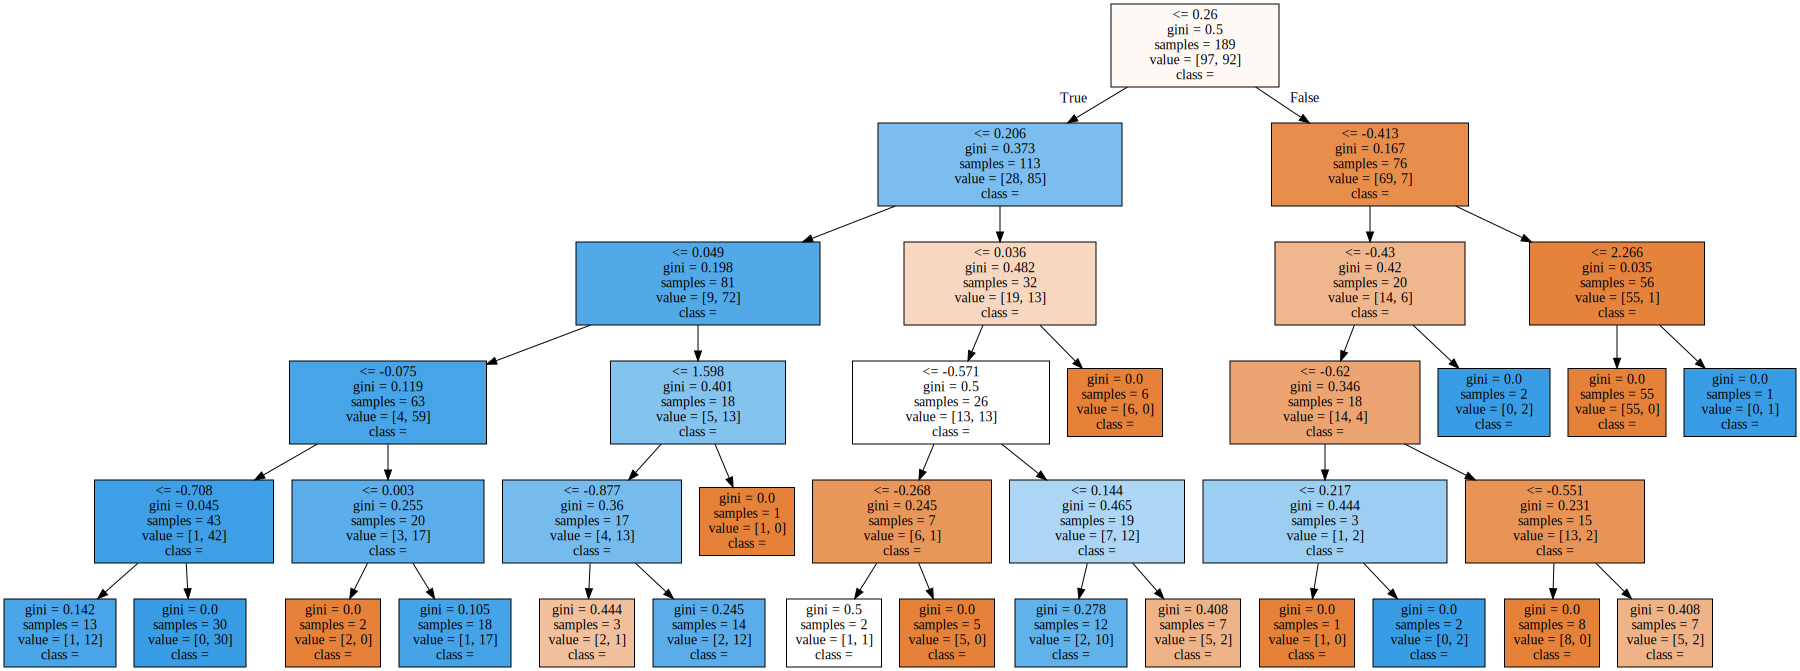

In [86]:
import graphviz

with open("tree.dot",encoding='utf-8') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)


Feature importances:
[0.083 0.175 0.531 0.191 0.019]
운전자본비율 : 0.083
이익잉여금총자산비율 : 0.175
총자산이익율 : 0.531
시장가부채비율 : 0.191
매출액회전율 : 0.019


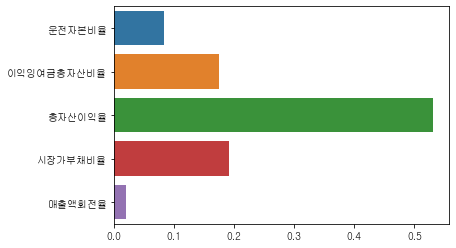

In [80]:
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

for name, value in zip(data.columns[:5], dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
    
sns.barplot(x=dt_clf.feature_importances_, y=data.columns[:5])

### 랜덤 포레스트